In [ ]:
# Level3 
# Task3 : Neural Networks with Tensor Flow/Keras

In [17]:
!pip install tensorflow

   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 2.4/332.0 MB 11.3 MB/s eta 0:00:30
    --------------------------------------- 4.5/332.0 MB 11.3 MB/s eta 0:00:29
    --------------------------------------- 7.3/332.0 MB 11.9 MB/s eta 0:00:28
   - -------------------------------------- 9.7/332.0 MB 11.7 MB/s eta 0:00:28
   - -------------------------------------- 11.8/332.0 MB 11.3 MB/s eta 0:00:29
   - -------------------------------------- 14.2/332.0 MB 11.4 MB/s eta 0:00:28
   -- ------------------------------------- 16.8/332.0 MB 11.5 MB/s eta 0:00:28
   -- ------------------------------------- 19.1/332.0 MB 11.6 MB/s eta 0:00:28
   -- ------------------------------------- 21.8/332.0 MB 11.6 MB/s eta 0:00:27
   -- ------------------------------------- 24.1/332.0 MB 11.6 MB/s eta 0:00:27
   --- ------------------------------------ 25.4/332.0 MB 11.1 MB/s eta 0:00:28
   --- ------------------------------------ 27.8/332.


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: C:\Users\MSI\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
# TensorFlow / Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [4]:
file_path = r"C:\Users\MSI\Desktop\ML Internship\Data Set For Task\1) iris.csv"
df = pd.read_csv(file_path)

In [5]:
print("Keys of iris_dataset:\n", df.keys())

Keys of iris_dataset:
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [12]:
print(df.head())
print(df.info())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [11]:
#Select features X and target y
feature_cols = [c for c in df.columns if c.lower() != "species"]
X = df[feature_cols].to_numpy(dtype=np.float32)
y = df["species"].astype(str).to_numpy()
print(X.shape)
print(y)

(150, 4)
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versi

In [14]:
# Train/Validation/Test split (60/20/20)
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42)

In [15]:
# Scale features (fit on train only, apply to val/test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)
X_test  = scaler.transform(X_test)

In [16]:
# One-hot encode labels for softmax output
ohe = OneHotEncoder(sparse_output=False)
y_train_ohe = ohe.fit_transform(y_train.reshape(-1, 1))
y_val_ohe   = ohe.transform(y_val.reshape(-1, 1))
y_test_ohe  = ohe.transform(y_test.reshape(-1, 1))

class_names = ohe.categories_[0].tolist()
input_dim   = X_train.shape[1]
n_classes   = len(class_names)

print("Classes:", class_names)
print("Shapes  -> X_train:", X_train.shape, " y_train_ohe:", y_train_ohe.shape)

Classes: ['setosa', 'versicolor', 'virginica']
Shapes  -> X_train: (90, 4)  y_train_ohe: (90, 3)


In [22]:
#Design a Feed-Forward Neural Network (Keras)
#Model Architecture 
def build_model(input_dim: int, n_classes: int) -> keras.Model:
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(16, activation="relu"),
        layers.Dropout(0.1),
        layers.Dense(8, activation="relu"),
        layers.Dense(n_classes, activation="softmax")  # one logit per class
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

model = build_model(input_dim, n_classes)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
#Train with Backprop + EarlyStopping & Checkpoints
#Training 
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=20, restore_best_weights=True
    ),
    keras.callbacks.ModelCheckpoint(
        "best_iris_keras.keras", monitor="val_loss", save_best_only=True
    )
]

history = model.fit(
    X_train, y_train_ohe,
    validation_data=(X_val, y_val_ohe),
    epochs=300,
    batch_size=16,
    callbacks=callbacks,
    verbose=0  # set to 1 to watch training live
)

print(f"Best validation accuracy: {max(history.history['val_accuracy']):.4f}")

Best validation accuracy: 1.0000


In [25]:
#Evaluate on Test Set + Confusion Matrix & Report
#Evaluation
test_loss, test_acc = model.evaluate(X_test, y_test_ohe, verbose=0)
print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

# Predictions → labels
probs = model.predict(X_test, verbose=0)
pred_idx = np.argmax(probs, axis=1)
true_idx = np.argmax(y_test_ohe, axis=1)

pred_labels = [class_names[i] for i in pred_idx]
true_labels = [class_names[i] for i in true_idx]

# Confusion matrix & classification report
cm = confusion_matrix(true_labels, pred_labels, labels=class_names)
print("\nClassification report:\n",
      classification_report(true_labels, pred_labels, target_names=class_names))

cm_df = pd.DataFrame(cm, index=[f"true_{c}" for c in class_names],
                        columns=[f"pred_{c}" for c in class_names])
cm_df

Test Loss: 0.0507 | Test Accuracy: 0.9667

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



,pred_setosa,pred_versicolor,pred_virginica
true_setosa,11,0,0
true_versicolor,0,13,0
true_virginica,0,1,5


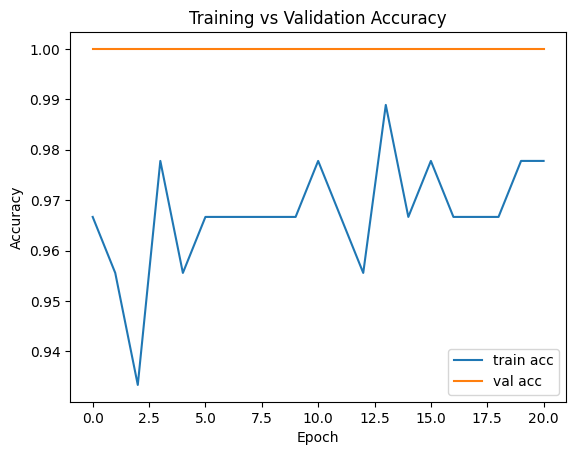

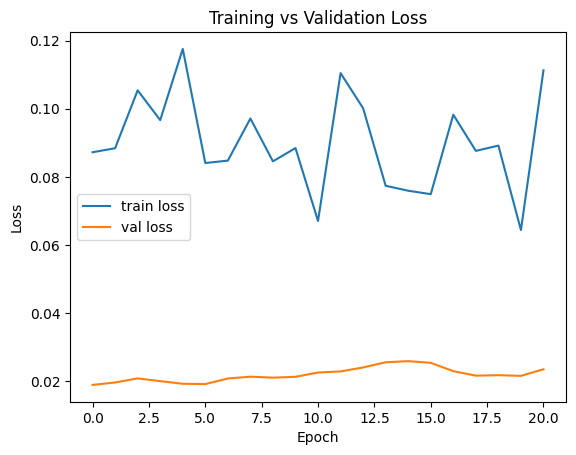

In [26]:
#Visualize Training & Validation Curves
#Visualizations 
def plot_history(h):
    # Accuracy
    plt.figure()
    plt.plot(h.history["accuracy"], label="train acc")
    plt.plot(h.history["val_accuracy"], label="val acc")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training vs Validation Accuracy")
    plt.legend()
    plt.show()

    # Loss
    plt.figure()
    plt.plot(h.history["loss"], label="train loss")
    plt.plot(h.history["val_loss"], label="val loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.show()

plot_history(history)

In [27]:
# Save Artifacts (metrics CSV, scaler & encoder for reuse)
#  Save useful artifacts 
metrics = {
    "test_loss": test_loss,
    "test_accuracy": test_acc,
    "n_train": len(X_train),
    "n_val": len(X_val),
    "n_test": len(X_test),
}
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("iris_keras_metrics.csv", index=False)

# Save scaler & encoder via joblib for real reuse
import joblib
joblib.dump(scaler, "scaler.joblib")
joblib.dump(ohe, "label_encoder.joblib")

print("Saved: best_iris_keras.keras, iris_keras_metrics.csv, scaler.joblib, label_encoder.joblib")

Saved: best_iris_keras.keras, iris_keras_metrics.csv, scaler.joblib, label_encoder.joblib
